In [33]:
# 导包
import  cv2
import numpy as np
from matplotlib import pyplot as plt
from math import fabs,sin,cos,radians,log10,sqrt
import scipy.stats as stats

init_img  = cv2.imread(r'C:\Users\CZQ\Desktop\Chapter2_1.pgm')
init_angle = 15
init_height,init_width = init_img.shape[:2]


def rotated(img,angle,method):
    # 获取宽高,旋转中心
    print(img.shape)
    height,width = img.shape[:2]
    x=width/2
    y=height/2

    # 获取初始旋转矩阵
    # getRotationMatrix2D(旋转中心,旋转角度,缩放比例),变换矩阵,填入到wrapAffine仿射变换的参数)
    # 旋转中选需要采用原图像的中心
    rotate_matrix = cv2.getRotationMatrix2D((x,y),angle,1)
    print(rotate_matrix)

    # 计算旋转后的显示范围,加1防止误差丢点
    rotated_height = int(width * fabs(sin(radians(angle))) + height * fabs(cos(radians(angle))))+1
    rotated_width = int(height * fabs(sin(radians(angle))) + width * fabs(cos(radians(angle))))+1

    # 修改旋转矩阵
    """
    [cos -sin (1-cos)*x + sin*y
    sin cos  (1-cos)*y - sin*x ]
    """
    rotate_matrix[0,2] += (rotated_width-width)/2
    rotate_matrix[1,2] += (rotated_height-height)/2

  
    # 旋转图像
    rotated_img = cv2.warpAffine(img,rotate_matrix,(rotated_width,rotated_height),None,method)
    return rotated_img

def recovered(img,angle,method):
    # 获取宽高,旋转中心
    print(img.shape)
    height,width = img.shape[:2]
    x=width/2
    y=height/2

    # 获取初始旋转矩阵
    # getRotationMatrix2D(旋转中心,旋转角度,缩放比例),变换矩阵,填入到wrapAffine仿射变换的参数)
    # 旋转中选需要采用原图像的中心
    rotate_matrix = cv2.getRotationMatrix2D((x,y),angle,1)
    print(rotate_matrix)

    # 计算旋转后的显示范围,目标区域不会因为恢复而丢点
    rotated_height = int(width * fabs(sin(radians(angle))) + height * fabs(cos(radians(angle))))
    rotated_width = int(height * fabs(sin(radians(angle))) + width * fabs(cos(radians(angle))))

    # 修改旋转矩阵
    rotate_matrix[0,2] += (rotated_width-width)/2
    rotate_matrix[1,2] += (rotated_height-height)/2

    # 旋转图像
    rotated_img = cv2.warpAffine(img,rotate_matrix,(rotated_width,rotated_height),None,method)

    # 计算图像起始坐标
    start_width = (len(rotated_img[0]) - len(init_img[0]))>>1 
    start_height = (len(rotated_img)-len(init_img))>>1 

    print(start_width, start_height,width,height,init_width,init_height)
    print(start_width, start_height, len(rotated_img[0]),len(rotated_img),len(init_img[0]),len(init_img))

    # img[height,width]
    return rotated_img[start_height:start_height+init_height,start_width:start_width+init_width]
    # return rotated_img

(132, 135, 3)
[[  0.96592583   0.25881905 -14.78205025]
 [ -0.25881905   0.96592583  19.71918101]]


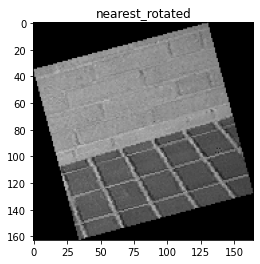

In [34]:
# 最近邻 旋转十五度
rotated_img_nearest = rotated(init_img,init_angle,cv2.INTER_NEAREST)
plt.title("nearest_rotated")
plt.imshow(rotated_img_nearest)

(132, 135, 3)
[[  0.96592583   0.25881905 -14.78205025]
 [ -0.25881905   0.96592583  19.71918101]]


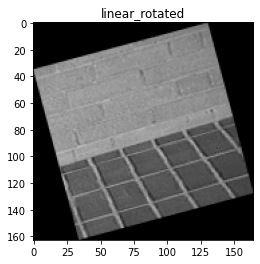

In [26]:
# 双线性 旋转十五度
rotated_img_linear = rotated(init_img,init_angle,cv2.INTER_LINEAR)
plt.title("linear_rotated")
plt.imshow(rotated_img_linear)

(132, 135, 3)
[[  0.96592583   0.25881905 -14.78205025]
 [ -0.25881905   0.96592583  19.71918101]]


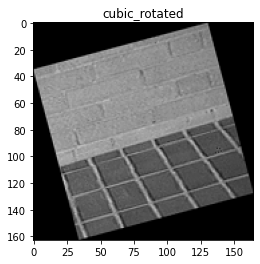

In [27]:
# 多项式 旋转十五度
rotated_img_cubic = rotated(init_img,init_angle,cv2.INTER_CUBIC)
plt.title("cubic_rotated")
plt.imshow(rotated_img_cubic)

(163, 165, 3)
[[  0.96592583  -0.25881905  23.90487151]
 [  0.25881905   0.96592583 -18.57552606]]
33 34 165 163 135 132
33 34 201 200 135 132


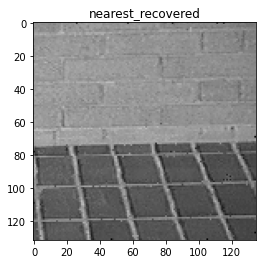

In [28]:
# 最近邻 恢复
recovered_img_nearest = recovered(rotated_img_nearest,-init_angle,cv2.INTER_NEAREST)
plt.title("nearest_recovered")
plt.imshow(recovered_img_nearest)

(163, 165, 3)
[[  0.96592583  -0.25881905  23.90487151]
 [  0.25881905   0.96592583 -18.57552606]]
33 34 165 163 135 132
33 34 201 200 135 132


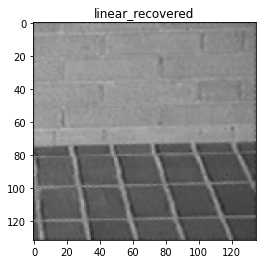

In [29]:
# 双线性 恢复
recovered_img_linear = recovered(rotated_img_linear,-init_angle,cv2.INTER_LINEAR)
plt.title("linear_recovered")
plt.imshow(recovered_img_linear)

(163, 165, 3)
[[  0.96592583  -0.25881905  23.90487151]
 [  0.25881905   0.96592583 -18.57552606]]
33 34 165 163 135 132
33 34 201 200 135 132


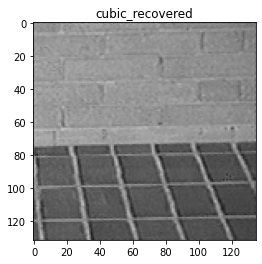

In [30]:
# 多项式 恢复
recovered_img_cubic = recovered(rotated_img_cubic,-init_angle,cv2.INTER_CUBIC)
plt.title("cubic_recovered")
plt.imshow(recovered_img_cubic)

接下来开始判断图像在正反旋转后与原图像的差别



In [31]:
# True:尺寸变了,False尺寸没变
def is_size_change(img,changed):
    assert img.shape[:2] == changed.shape[:2]
    return False
print(is_size_change(init_img,recovered_img_nearest))
print(is_size_change(init_img,recovered_img_linear))
print(is_size_change(init_img,recovered_img_cubic))

False
False
False


In [32]:
def get_stats(img,changed,method):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY).astype(np.float32)
    changed_gray = cv2.cvtColor(changed,cv2.COLOR_BGR2GRAY).astype(np.float32)
    diff = abs(img_gray - changed_gray)
    print(method,"灰度误差绝对值的中位数", np.median(diff))
    print(method, "灰度误差绝对值的平均值",np.average(diff))
    print(method, "灰度误差绝对值的众数",stats.mode(diff)[0][0][0])

get_stats(init_img,recovered_img_nearest,"nearest")
print("===========================================")
get_stats(init_img,recovered_img_linear,"linear")
print("=======================================")
get_stats(init_img,recovered_img_cubic,"cubic")


nearest 灰度误差绝对值的中位数 0.0
nearest 灰度误差绝对值的平均值 1.0544332
nearest 灰度误差绝对值的众数 0.0
linear 灰度误差绝对值的中位数 3.0
linear 灰度误差绝对值的平均值 4.645286
linear 灰度误差绝对值的众数 4.0
cubic 灰度误差绝对值的中位数 2.0
cubic 灰度误差绝对值的平均值 2.526992
cubic 灰度误差绝对值的众数 1.0


nearest 灰度值误差平均值 67.024375
nearest 灰度值误差中位数 67.0
1600


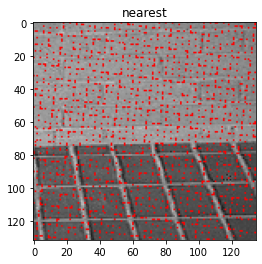

In [144]:
def get_gray_change (img,changed,diffValue,method):

    # print(img)

    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY).astype(np.float32)
    changed_gray = cv2.cvtColor(changed,cv2.COLOR_BGR2GRAY).astype(np.float32)
    # 得到两图像的灰度值插值
    diff = abs(img_gray - changed_gray)
    # print(type(diff))
    # print(diff.shape)
    temp_img = np.copy(img)
    
    for i in range(diff.shape[0]):
        for j in range(diff.shape[1]):
            if diff[i,j] >diffValue:
                # print(j)
                # print(type(j))
                temp_img[i,j]=[255,0,0]
    plt.title(method)
    plt.imshow(temp_img)

    # 统计灰度值大于diffValue的点个数
    count = np.where(abs(diff)>diffValue)
    count = np.asarray(count)
    stats.mode
    print(method,"灰度值误差平均值",np.average(count[1]))
    print(method,"灰度值误差中位数",np.median(count[1]))
    return count.shape[1]


print(get_gray_change(init_img,recovered_img_nearest,0,"nearest"))




In [14]:
print(get_gray_change(init_img,recovered_img_linear,0,"linear"))

NameError: name 'get_gray_change' is not defined

cubic 灰度值误差平均值 66.26854493580599
cubic 灰度值误差中位数 66.0
14020


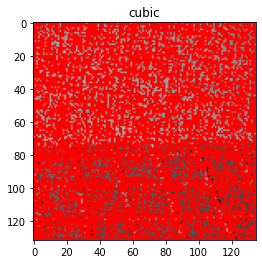

In [146]:
print(get_gray_change(init_img,recovered_img_cubic,0,"cubic"))


In [147]:
# 首先采用PSNR峰值信噪比对图像进行评判
def get_psnr(img,changed):
    mse = ((img/255-changed/255)**2).mean()
    psnr = 10 * log10(1/mse)
    return psnr

nearest_psnr =  get_psnr(init_img,recovered_img_nearest)
print("最近邻处理后的峰值信噪比:",nearest_psnr)
linear_psnr = get_psnr(init_img,recovered_img_linear)
print("双线性的峰值信噪比:",linear_psnr)
cubic_psnr = get_psnr(init_img,recovered_img_cubic)
print("多项式的峰值信噪比:",cubic_psnr)


最近邻处理后的峰值信噪比: 32.80354570714371
双线性的峰值信噪比: 30.735359842497054
多项式的峰值信噪比: 36.03058661228205


In [148]:
# 采用SSIM结构相似性对图像进行评判
def get_ssim(img,changed):
    # assert len(img.shape) == 2 and len(changed) == 2
    # assert img.shape == changed.shape
    img_mean = img.mean()
    changed_mean = changed.mean()
    sigma_img = np.sqrt(((img - img_mean)**2).mean())
    sigma_changed = np.sqrt(((changed -changed_mean)**2).mean())
    sigma = ((img - img_mean) * (changed - changed_mean)).mean()

    K1,K2,L = 0.01,0.03,255
    C1 = (K1*L)**2
    C2 = (K2*L)**2
    C3 = C2/2
    L12 = (2*img_mean*changed_mean + C1) / (img_mean**2 + changed_mean**2 + C1)
    C12 = (2*sigma_img*sigma_changed + C2)/(sigma_img**2 + sigma_changed**2 + C2)
    S12 = (sigma + C3) / (sigma_img*sigma_changed + C3)
    return L12 * C12 * S12

nearest_ssim = get_ssim(init_img,recovered_img_nearest)
print("最近邻的SSIM",nearest_ssim)
linear_ssim = get_ssim(init_img,recovered_img_linear)
print("双线性的SSIM",linear_ssim)
cubic_ssim = get_ssim(init_img,recovered_img_cubic)
print("多项式的SSIM",cubic_ssim)

最近邻的SSIM 0.9857224643888132
双线性的SSIM 0.9758525820271869
多项式的SSIM 0.9931468860233463
